In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

In [2]:
df = pd.read_csv('socialmobility.csv')
df

,father,son,count
0,farm,farm,703
1,farm,unskilled,1478
2,farm,skilled,1430
3,farm,professional,1109
4,unskilled,farm,58
5,unskilled,unskilled,1756
6,unskilled,skilled,1630
7,unskilled,professional,1568
8,skilled,farm,63
9,skilled,unskilled,1453


There are 16 categories, we can start with uniform Dirichlet distribution over $\vec{p}$ with $\vec{\alpha} = (1, \cdots, 1)$.

$$Dirichlet(p_{1}, p_{2}, \cdots, p_{16}) | (1, 1, \cdots, 1)$$

Given that info, we know that the Dirichlet distribution is a conjugate prior for our Multinomial distribution. Therefore the posterior is also a Dirichlet distribution. 
The new alpha is given as $\vec{\alpha_{p\text{post}}} = \vec{\alpha_{\text{prior}}} + \vec{x}$

In [3]:
df['posterior'] = df['count'] + 1
df

,father,son,count,posterior
0,farm,farm,703,704
1,farm,unskilled,1478,1479
2,farm,skilled,1430,1431
3,farm,professional,1109,1110
4,unskilled,farm,58,59
5,unskilled,unskilled,1756,1757
6,unskilled,skilled,1630,1631
7,unskilled,professional,1568,1569
8,skilled,farm,63,64
9,skilled,unskilled,1453,1454


In [4]:
df.loc[df['father'] == 'unskilled']

,father,son,count,posterior
4,unskilled,farm,58,59
5,unskilled,unskilled,1756,1757
6,unskilled,skilled,1630,1631
7,unskilled,professional,1568,1569


The `unskilled_skilled` category with index 6 at position 2 represents the situation whereby the father was unskilled and their son was skilled. To calculate the 95% probability of this situaion we use `numpy`.

In [5]:
samples_1 = sts.dirichlet.rvs(list(df.loc[df['father'] == 'unskilled']['posterior']), size=10000)
samples_1

array([[0.01000769, 0.36811283, 0.31352774, 0.30835173],
       [0.01210717, 0.33161371, 0.33040598, 0.32587314],
       [0.01018318, 0.35588252, 0.32475957, 0.30917473],
       ...,
       [0.01166595, 0.34415056, 0.32069999, 0.3234835 ],
       [0.01210025, 0.36041474, 0.31823983, 0.30924518],
       [0.01324952, 0.34997337, 0.32109543, 0.31568168]])

Getting only the `farm` values whereby the father was a farmer. The index of when the child is `skilled` is 2. Therefore we would calculate the dirichlet of index 2.

In [6]:
percentiles = np.percentile(samples_1[:, 2], [2.5, 97.5])

print(f"95% confidence interval = {percentiles}")

95% confidence interval = [0.31262982 0.33792288]


Doing the same thing for a father that works on the farm and their son works as a professional `farm_professional` index 3

In [7]:
df.loc[df['father'] == 'farm']

,father,son,count,posterior
0,farm,farm,703,704
1,farm,unskilled,1478,1479
2,farm,skilled,1430,1431
3,farm,professional,1109,1110


In [8]:
samples_2 = sts.dirichlet.rvs(list(df.loc[df['father'] == 'farm']['posterior']), size=10000)
samples_2

array([[0.14810565, 0.30579066, 0.30841524, 0.23768844],
       [0.15020518, 0.30827789, 0.30524779, 0.23626914],
       [0.16171253, 0.31947542, 0.29803704, 0.22077502],
       ...,
       [0.14752902, 0.30673916, 0.29811246, 0.24761935],
       [0.14296627, 0.30405357, 0.30391702, 0.24906314],
       [0.14871411, 0.31435779, 0.30432582, 0.23260228]])

In [9]:
percentiles = np.percentile(samples_2[:, 3],  [2.5, 97.5])

print(f"95% confidence interval = {percentiles}")

95% confidence interval = [0.22280737 0.24694661]


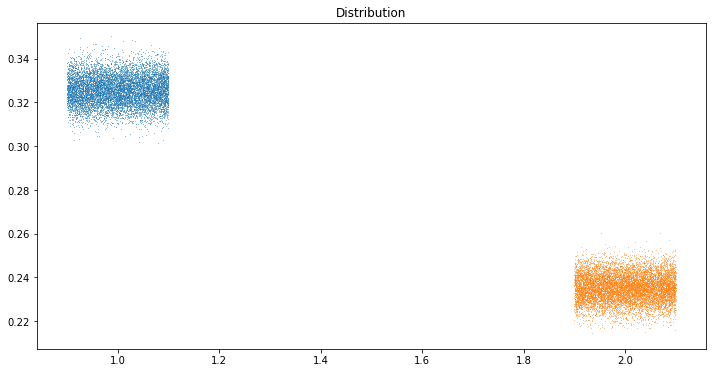

In [10]:
to_plot = []
samples = [samples_1[:, 2], samples_2[:, 3]]
plt.figure(figsize=(12, 6))
for i in range(2):
    y = samples[i]
    plt.plot(sts.uniform.rvs(loc=i+1-0.1, scale=0.2, size=len(y)), y, ',', alpha=0.5)
plt.title('Distribution')
plt.show()